# Week 2 (Thursday) In-Class Statistics Lab
## Frequentist Probability and Probability Distributions

### Lab Overview
This lab is designed to help you build intuition for probability distributions by:
- **Changing parameters** and observing what happens
- **Visualizing** distributions
- Using **simulation** (frequentist probability) to approximate theoretical results

Distributions covered:
- Discrete: **Binomial**, **Poisson**
- Continuous: **Normal**, **Uniform**

---

### Objectives
By the end of this lab, you will be able to:
- Explain probability in a frequentist (long-run frequency) sense
- Describe how distribution **parameters** affect shape and probabilities
- Compute and estimate probabilities for Binomial, Poisson, Normal, and Uniform distributions
- Use plots to interpret distributions and compare parameter settings

---

### Instructions
For each activity:
1. Run the cells in order.
2. **Change the parameter values** as prompted.
3. Answer the questions in the Markdown response cells.

#### **Note**
We typically use pre-built distribution functions rather than coding them out directly via the scipy.stats package for example. We will do this futher into the fellowship. However for now, please inspect these function defintions and map how they compare to mathematical formulas. 

You may also notice that the names of variables/parameters are reperesented differently. E.g. in the binomial_pdf we use k instead of X, and p instead of θ.

Lastly take note of some of the conditional statements. E.g. why must k < 0 ?


In [1]:
# Setup cell (run this first)
import math
import random

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

def _check(name, condition, success_msg="Pass", fail_msg="Check failed"):
    if condition:
        print(f"{name}: {success_msg}")
    else:
        raise AssertionError(f"{name}: {fail_msg}")

def binomial_pmf(k, n, p):
    if k < 0 or k > n:
        return 0.0
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def poisson_pmf(k, lam):
    if k < 0:
        return 0.0
    return (math.exp(-lam) * (lam ** k)) / math.factorial(k)

def normal_cdf(x, mu=0.0, sigma=1.0):
    """Normal(mu, sigma) CDF using the error function."""
    z = (x - mu) / (sigma * math.sqrt(2))
    return 0.5 * (1 + math.erf(z))

def normal_pdf(x, mu=0.0, sigma=1.0):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

print("Setup complete.")


Setup complete.


## Activity 1: Frequentist Probability (Simulation) and Parameter Intuition

Frequentist probability treats probability as the **long-run relative frequency** of an event.

In this activity, you will simulate a biased coin with probability of heads = `p_heads` and see how the estimate changes as:
- You increase the number of flips (`n_flips`)
- You change the parameter (`p_heads`)


n=   20  estimate=0.5500  true_p=0.50
n=  100  estimate=0.5000  true_p=0.50
n=  500  estimate=0.4960  true_p=0.50
n= 2000  estimate=0.4845  true_p=0.50
n=10000  estimate=0.4990  true_p=0.50
n=1000000  estimate=0.4998  true_p=0.50
n=10000000  estimate=0.5002  true_p=0.50


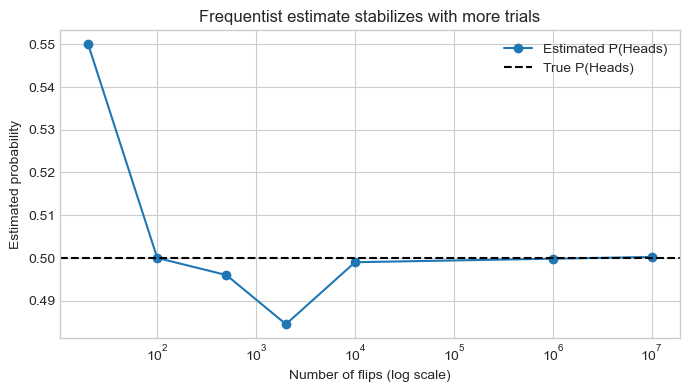

In [4]:
def estimate_p_heads(n_flips, p_heads, seed=0):
    """Estimate P(Heads) using n_flips from a coin with true probability p_heads."""
    random.seed(seed)
    heads = 0
    for _ in range(n_flips):
        if random.random() < p_heads:
            heads += 1
    return heads / n_flips

def run_coin_experiment(n_flips_list, p_heads, seed=0):
    estimates = []
    for n in n_flips_list:
        estimates.append(estimate_p_heads(n, p_heads, seed=seed))
    return estimates

# Try different sample sizes
n_flips_list = [20, 100, 500, 2000, 10000, 1000000, 10000000]

# CHANGE THIS parameter and re-run
p_heads = 0.5

estimates = run_coin_experiment(n_flips_list, p_heads, seed=42)
for n, est in zip(n_flips_list, estimates):
    print(f"n={n:>5}  estimate={est:.4f}  true_p={p_heads:.2f}")

plt.figure(figsize=(8,4))
plt.plot(n_flips_list, estimates, marker="o", label="Estimated P(Heads)")
plt.axhline(p_heads, color="black", linestyle="--", label="True P(Heads)")
plt.xscale("log")
plt.xlabel("Number of flips (log scale)")
plt.ylabel("Estimated probability")
plt.title("Frequentist estimate stabilizes with more trials")
plt.legend()
plt.show()


### Activity 1 Questions (Answer in Markdown)

1. Set `p_heads = 0.5`. What happens to the estimate as `n` grows?
2. Set `p_heads = 0.65`. How do the estimates change compared to `p_heads = 0.5`?
3. Try `p_heads = 0.2`. For small `n` (like 20), do you ever see an estimate far from 0.2? Why?

Write your responses below.


#### Your Answers (Activity 1)
- 1.
- 2.
- 3.


## Activity 2: Binomial Distribution (n and p)

The **Binomial distribution** models the number of successes in a fixed number of independent trials.

- Parameters:
  - `n`: number of trials
  - `p`: probability of success on each trial
- Random variable:
  - `X`: number of successes

In this activity, you will change `n` and `p`, then observe how the distribution changes.


In [ ]:
def plot_binomial(n, p):
    ks = np.arange(0, n + 1)
    probs = np.array([binomial_pmf(int(k), int(n), float(p)) for k in ks])

    plt.figure(figsize=(9,4))
    plt.bar(ks, probs, width=0.8, edgecolor="black")
    plt.xlabel("k (number of successes)")
    plt.ylabel("P(X = k)")
    plt.title(f"Binomial(n={n}, p={p})")
    plt.show()

    # Summary stats for Binomial
    mean_x = n * p
    var_x = n * p * (1 - p)
    print(f"Theoretical mean: {mean_x:.3f}")
    print(f"Theoretical variance: {var_x:.3f}")
    print(f"Theoretical stdev: {math.sqrt(var_x):.3f}")

# CHANGE these and re-run
n = 20
p = 0.5

plot_binomial(n, p)


In [ ]:
# Binomial probability questions (edit parameters above, then use these)

def binomial_cdf(k_max, n, p):
    return sum(binomial_pmf(k, n, p) for k in range(0, k_max + 1))

# Example calculations (adjust n and p above first)
p_leq_8 = binomial_cdf(8, n, p)
p_ge_15 = 1 - binomial_cdf(14, n, p)

print(f"For Binomial(n={n}, p={p}):")
print(f"P(X <= 8)  = {p_leq_8:.4f}")
print(f"P(X >= 15) = {p_ge_15:.4f}")


### Activity 2 Questions (Answer in Markdown)

1. Hold `n = 20` fixed. Compare the plot for `p = 0.2`, `p = 0.5`, and `p = 0.8`. How does changing `p` affect:
   - the center of the distribution?
   - the symmetry/skew?
2. Hold `p = 0.5` fixed. Compare the plot for `n = 10`, `n = 50`, and `n = 200`. What changes about:
   - the spread (variance/stdev)?
   - the overall shape?
3. Choose one setting (your choice). Report **P(X <= 8)** and **P(X >= 15)**. Are these probabilities "small" or "large" in your chosen scenario? Explain.

Write your responses below.


#### Your Answers (Activity 2)
- 1.
- 2.
- 3.


## Activity 3: Poisson Distribution (rate parameter λ)

The **Poisson distribution** models the number of events in a fixed interval when events happen:
- independently
- at a constant average rate

- Parameter:
  - `λ` (lambda): average events per interval

In this activity, you will change `λ` and see how the distribution shifts and spreads.


In [ ]:
def plot_poisson(lam, k_max=None):
    if k_max is None:
        # A reasonable plotting range that grows with lambda
        k_max = int(max(15, lam + 5 * math.sqrt(lam)))
    ks = np.arange(0, k_max + 1)
    probs = np.array([poisson_pmf(int(k), float(lam)) for k in ks])

    plt.figure(figsize=(9,4))
    plt.bar(ks, probs, width=0.8, edgecolor="black")
    plt.xlabel("k (events in interval)")
    plt.ylabel("P(X = k)")
    plt.title(f"Poisson(λ={lam})")
    plt.show()

    # Summary stats for Poisson
    print(f"Theoretical mean: {lam:.3f}")
    print(f"Theoretical variance: {lam:.3f}")
    print(f"Theoretical stdev: {math.sqrt(lam):.3f}")

# CHANGE this parameter and re-run
lam = 3

plot_poisson(lam)


In [ ]:
def poisson_cdf(k_max, lam):
    return sum(poisson_pmf(k, lam) for k in range(0, k_max + 1))

# Example calculations (adjust lam above first)
p_leq_2 = poisson_cdf(2, lam)
p_ge_7 = 1 - poisson_cdf(6, lam)

print(f"For Poisson(λ={lam}):")
print(f"P(X <= 2)  = {p_leq_2:.4f}")
print(f"P(X >= 7)  = {p_ge_7:.4f}")


### Activity 3 Questions (Answer in Markdown)

1. Compare the plot for `λ = 1`, `λ = 5`, and `λ = 12`. What happens to:
   - the center (typical k value)?
   - the spread?
2. For each of the three λ values above, compute **P(X <= 2)**. Which λ makes that probability the largest, and why?
3. Describe (in words) a real-world situation that could reasonably be modeled by a Poisson distribution. What would λ represent?

Write your responses below.


#### Your Answers (Activity 3)
- 1.
- 2.
- 3.


## Activity 4: Continuous Distributions (Uniform and Normal)

Continuous distributions assign probabilities over **intervals** (not exact points).

You will:
- change parameters
- visualize the probability density
- compute interval probabilities
- compare theory to simulation


### Part A: Uniform(a, b)

Uniform(a, b) means values between `a` and `b` are equally likely.

For Uniform(a, b):
- Density is constant between a and b
- P(x1 <= X <= x2) = (x2 - x1) / (b - a) (after clipping to [a, b])


In [ ]:
def uniform_interval_prob(x1, x2, a, b):
    left = max(min(x1, x2), a)
    right = min(max(x1, x2), b)
    if right <= left:
        return 0.0
    return (right - left) / (b - a)

def plot_uniform(a, b, intervals=None):
    xs = np.linspace(a - (b-a)*0.2, b + (b-a)*0.2, 400)
    ys = np.where((xs >= a) & (xs <= b), 1/(b-a), 0.0)

    plt.figure(figsize=(9,4))
    plt.plot(xs, ys, linewidth=2)
    plt.ylim(bottom=-0.02)
    plt.xlabel("x")
    plt.ylabel("density")
    plt.title(f"Uniform(a={a}, b={b})")

    if intervals:
        for (x1, x2) in intervals:
            x_left = max(min(x1, x2), a)
            x_right = min(max(x1, x2), b)
            if x_right > x_left:
                xs_fill = np.linspace(x_left, x_right, 50)
                ys_fill = np.full_like(xs_fill, 1/(b-a))
                plt.fill_between(xs_fill, 0, ys_fill, alpha=0.25)
    plt.show()

    print(f"Theoretical mean: {(a+b)/2:.3f}")
    print(f"Theoretical variance: {((b-a)**2)/12:.3f}")

# CHANGE these parameters and re-run
a, b = 0, 12

# Interval(s) to visualize
intervals_to_shade = [(0, 3), (4, 9)]

plot_uniform(a, b, intervals=intervals_to_shade)

# Compute interval probabilities (edit these intervals too)
p_0_3 = uniform_interval_prob(0, 3, a, b)
p_4_9 = uniform_interval_prob(4, 9, a, b)
print(f"P(0 <= X <= 3) = {p_0_3:.4f}")
print(f"P(4 <= X <= 9) = {p_4_9:.4f}")


#### Uniform Questions (Answer in Markdown)

1. Change from `Uniform(0, 12)` to `Uniform(0, 24)`.
   - What happens to the **height** of the density line?
   - What happens to **P(0 <= X <= 3)**?
2. Create your own Uniform(a, b) scenario (choose a and b). Write what a and b represent in context.
3. For your scenario, compute the probability of an interval of your choice. Explain whether it seems reasonable.


#### Your Answers (Uniform)
- 1.
- 2.
- 3.


### Part B: Normal(μ, σ)

The Normal distribution is controlled by:
- `μ` (mu): the center (mean)
- `σ` (sigma): the spread (standard deviation)

You will change μ and σ, then interpret how the curve and tail probabilities change.


In [ ]:
def plot_normal(mu, sigma, x_min=None, x_max=None, shade_interval=None):
    if x_min is None:
        x_min = mu - 4*sigma
    if x_max is None:
        x_max = mu + 4*sigma

    xs = np.linspace(x_min, x_max, 600)
    ys = np.array([normal_pdf(float(x), mu=mu, sigma=sigma) for x in xs])

    plt.figure(figsize=(9,4))
    plt.plot(xs, ys, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("density")
    plt.title(f"Normal(μ={mu}, σ={sigma})")

    if shade_interval is not None:
        a, b = shade_interval
        left = min(a, b)
        right = max(a, b)
        mask = (xs >= left) & (xs <= right)
        plt.fill_between(xs[mask], 0, ys[mask], alpha=0.25)
    plt.show()

    print(f"Theoretical mean: {mu:.3f}")
    print(f"Theoretical variance: {sigma**2:.3f}")

def normal_interval_prob(a, b, mu, sigma):
    left = min(a, b)
    right = max(a, b)
    return normal_cdf(right, mu=mu, sigma=sigma) - normal_cdf(left, mu=mu, sigma=sigma)

# CHANGE these parameters and re-run
mu = 75
sigma = 10

# Choose an interval to visualize and compute
interval = (65, 85)

plot_normal(mu, sigma, shade_interval=interval)

p_between = normal_interval_prob(interval[0], interval[1], mu, sigma)
p_ge_90 = 1 - normal_cdf(90, mu=mu, sigma=sigma)
print(f"P({interval[0]} <= X <= {interval[1]}) = {p_between:.4f}")
print(f"P(X >= 90) = {p_ge_90:.4f}")


In [ ]:
# Simulation to compare with theory (frequentist idea)

def simulate_normal(mu, sigma, n=200000, seed=0):
    random.seed(seed)
    return [random.gauss(mu, sigma) for _ in range(n)]

samples = simulate_normal(mu, sigma, n=200000, seed=9)

a, b = interval
p_between_sim = sum((x >= min(a,b)) and (x <= max(a,b)) for x in samples) / len(samples)
p_ge_90_sim = sum(x >= 90 for x in samples) / len(samples)

print("Simulated P(interval):", round(p_between_sim, 4))
print("Simulated P(X >= 90):", round(p_ge_90_sim, 4))

# Histogram with theoretical curve overlay
plt.figure(figsize=(9,4))
plt.hist(samples, bins=60, density=True, alpha=0.35, edgecolor="black", label="Simulated histogram")

xs = np.linspace(mu - 4*sigma, mu + 4*sigma, 600)
ys = np.array([normal_pdf(float(x), mu=mu, sigma=sigma) for x in xs])
plt.plot(xs, ys, linewidth=2, label="Theoretical PDF")

plt.title(f"Normal(μ={mu}, σ={sigma}): Simulation vs Theory")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.show()


#### Normal Questions (Answer in Markdown)

1. Hold `σ = 10` fixed. Change `μ` from 60 to 75 to 90.
   - What changes about the curve?
   - What stays the same?
2. Hold `μ = 75` fixed. Change `σ` from 5 to 10 to 20.
   - What happens to the height and width of the curve?
   - What happens to **P(X >= 90)** as σ increases?
3. Choose a realistic context for a Normal distribution (your choice). What do μ and σ represent?


#### Your Answers (Normal)
- 1.
- 2.
- 3.


## Wrap-Up Reflection
Answer in complete sentences.

1. Pick one distribution from today (Binomial, Poisson, Normal, or Uniform). Which parameter had the biggest impact on the probability you computed? Explain.
2. How did the visualizations help you understand what the parameters do?
3. When would simulation (frequentist estimation) be helpful even if you know the theoretical model?


#### Your Answers (Wrap-Up)
- 1.
- 2.
- 3.


In [ ]:
# Optional quick checks to confirm core functions behave reasonably
_check("PMF check (binomial)", abs(sum(binomial_pmf(k, 20, 0.4) for k in range(0, 21)) - 1) < 1e-9)
_check("PMF check (poisson)", abs(sum(poisson_pmf(k, 3) for k in range(0, 50)) - 1) < 1e-6)
print("All optional checks passed.")
